#### <font color=#8B0000>Problem B3: Gravitational Field of a Binary Star System [15 marks]</font>

In this problem, you will be simulating the gravitational field of a binary star system. There are two stars of masses $M_1 = 2\times 10^{30}$ kg (approximately the mass of the Sun) and $M_2 = 4\times 10^{30}$ kg separated by a distance $d = 10^{11}$ m. You are tasked with plotting the gravitational field vectors in the region surrounding the binary system. For simplicity, let's assume that both stars are stationary and lie along the $x$-axis, with $M_1$ located at $(-0.5d, 0)$ and $M_2$ located at $(+0.5d, 0)$.

The gravitational field at any point $(x,y)$ due to a star with mass $M$ located at $(x_0, y_0)$ is given by:
$$\vec{g} = -\frac{GM}{r^2} \hat{r}$$

where:
* $G = 6.674 \times 10^{-11}$ m<sup>3</sup>kg<sup>-1</sup>s<sup>-2</sup> is the gravitational constant,
* $r = \sqrt{(x-x_0)^2 + (y-y_0)^2}$ is the distance from the mass to the point $(x,y)$, and
* $\hat{r}$ is the unit vector pointing from the mass to the point $(x,y)$.

Your task is to:
* Write a Python function using `numpy` to compute the gravitational field vector at any point $(x,y)$ due to both stars
* Use `plt.quiver` and a `for` loop to create a plot of the gravitational field vectors at discrete points surrounding the binary system - you must use a different colour for the field vectors for each star
* Display the binary star locations on the plot as points or markers
* Make sure the plot is well-labelled and that the vector field appears physically meaningful

Grades will be broken down as follows:
* 5 marks for the correct implementation of gravitational field calculation through a function - be mindful of handling vector components
* 3 marks for generating a set of $(x,y)$ coordinates through a `for` loop to evaluate gravitational field and having enough points made
* 4 marks for correctly using `np.quiver` to plot the gravitational vector fields and must plot stars as well
* 2 marks for correctly plotting and labelling stars, vector fields and having titles, labeled axes and a legend
* 1 mark for overall quality of commenting and code

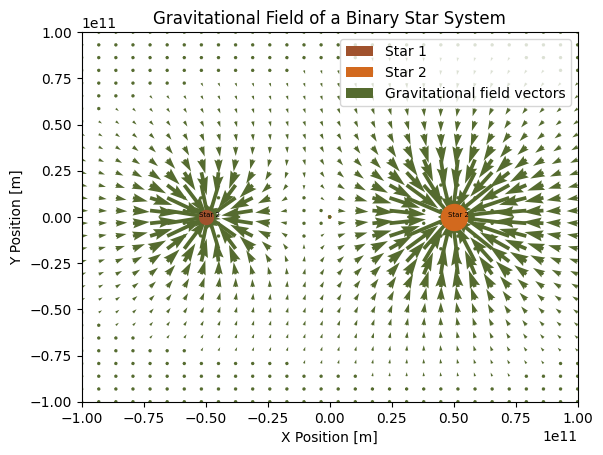

In [63]:
# Enter solution here and be sure to add comments to explain each of your key steps
import numpy as np 
import matplotlib.pyplot as plt 

#Note: I went for a tree 🌳 theme for my graph :)
#Note: This function plots the NET Gravitational field due to both stars at any point (x,y), hence I could not make separate colours or fields. However, Prof. Lee said this is okay!
#NOTE: Some vectors are so close to the stars that it looks like the vector
# is pointing away from the star, however this is not the case, it's just the scaling hasn't been able to coperate!

#Define given quantitites: 

m_1 = 2*10**30 #in kg 

m_2 = 4*10**30 #in kg 

d = 10**11 # in m

G = 6.674*10**-11 # in  N*m^2/kg^2

def euclidean_distance(x:float, x_0: float, y:float, y_0:float): 
    """Takes 2 points, (x,y), (x_0,y_0) and 
    returns their euclidean distance"""

    return ( (x-x_0)**2  +  (y-y_0)**2 )**(1/2)


def gravitational_field_vector(x:float, y:float): 
    """This function returns the gravitational field at any point (x_0, y_0) 
    due to a mass located at some coordinate (x,y)"""

    # Get gravitational field at (x,y) due to mass 1

    # define position of star 1
    x_0 = -0.5*d
    y_0 = 0

    #Get the distance between star 1 and some point in space 
    r1 = euclidean_distance(x, x_0, y, y_0)

    # Create a radius so that vectors don't go "through" the ball
    if r1 < 1.5*10**10: 
        return np.array([0,0])

    # Get a displacement vector
    r1_vector = np.array([(x-x_0), (y-y_0)])
    
    
    #Commute the unit vector of the displacement vector 
    r1_hat = r1_vector/(np.linalg.norm(r1_vector))

    # gravitational field of star of mass M_1 unto an arbitrary object located at coordinates (x,y)
 
    g1 = (-G*m_1/(r1**2))*(r1_hat)


    # Repeating the same steps as above for star 2! 

    x_0 = 0.5*(d)
    y_0 = 0

    r2 = euclidean_distance(x, x_0, y, y_0)

    # Create a radius so that vectors don't go "through" the ball
    if r2 < 2*10**10: 
        return np.array([0,0])
    
    r2_vector = np.array([(x-x_0), (y-y_0)])

    r2_hat = r2_vector/np.linalg.norm(r2_vector)

    # gravitational field of star of mass M_2 unto an arbitrary object located at coordinates (x,y)

    g2 = (-G*m_2/(r2**2))*(r2_hat)

    return (g1 + g2)


#Plotting Stage:

# Create range for x and y axes

plt.xlim(-10**11,10**11)
plt.ylim(-10**11, 10**11)

#Create a set of 100 x and y points,
# we will omit negative y for this axis. 

points_array = np.linspace(-10**11, 10**11, 30)

plt.quiver(0,-10**6, 0, 2*10**6.1, angles='xy', scale_units ='xy', scale=1, color="chocolate")

# We exceed the range of the axis to remove the arrow in the visual photo, **note plt.axvline could have been used**. 😆

# Use a for loop to plot all 100 points, 
# using each corresponding (x,y) pair

for i in points_array: 
    for j in points_array: 

        plt.quiver([i], [j], gravitational_field_vector(i,j)[0], gravitational_field_vector(i,j)[1], angles='xy', scale=5,color="darkolivegreen")


#Create labels so everything is consistent with my legend
plt.quiver([0], [0], 0, 0, angles='xy', scale=10,color= "sienna", label= "Star 1")
plt.quiver([0], [0], 0, 0, angles='xy', scale=10,color= "Chocolate", label= "Star 2")
plt.quiver([0], [0], 0, 0, angles='xy', scale=10,color= "darkolivegreen", label= "Gravitational field vectors")


# Plot both stars as circles
plt.scatter(-0.5*d, 0, s=100, color='sienna')
plt.scatter(0.5*d, 0, s=350, color='chocolate')

#Creating labels
plt.xlabel("X Position [m]")
plt.ylabel("Y Position [m]")
plt.title("Gravitational Field of a Binary Star System")

plt.text(x = d/(2.10), y=0, s= "Star 2", fontsize=5, color='black')
plt.text(x = -d/1.90, y=0, s= "Star 2", fontsize=5, color='black')

plt.legend()
plt.show()










In [9]:
import numpy as np
A = np.array([[2,-2,3],[4,1,-1]])
B = np.array([[-3,-4,1],[2,-5,3]])
C = np.array([[1,-2],[2,1],[4,-2]])
C = C.T
3*A -2*B + C

array([[ 13,   4,  11],
       [  6,  14, -11]])